## Install and import dependencies

In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
!cd yolov5 & pip install -r requirements.txt

In [3]:
import torch  # to load the model
import numpy as np  # for array transformations
import matplotlib.pyplot as plt  # visualising the image
import cv2 as cv  # access webcam feed

## Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\adhri/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-21 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Make detections (before training on custom data)

In [8]:
img = 'cars.jpg'

In [9]:
results = model(img)

In [10]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 480x962 21 cars, 6 trucks
Speed: 48.7ms pre-process, 78.3ms inference, 5.0ms NMS per image at shape (1, 3, 320, 640)

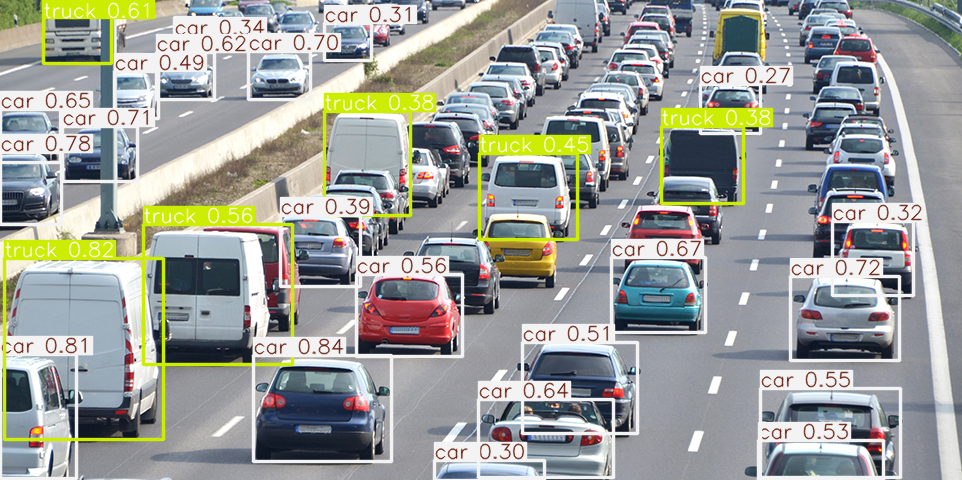

In [11]:
# Shows the image with detected objects in it
results.show()

## Real time detections

In [12]:
cap = cv.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)

    cv.imshow('YOLO', np.squeeze(results.render()))

    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

## Train from scratch

In [13]:
import os
import time
import uuid

In [14]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['thumbsup', 'thumbsdown']
number_imgs = 20

In [ ]:
cap = cv.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))

    time.sleep(5)

    for i in range(number_imgs):
        print("Collected images for {},image number {}".format(label, i))
        ret, frame = cap.read()

        img_name = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
        cv.imwrite(img_name, frame)
        cv.imshow('Image collection', frame)
        time.sleep(1)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

In [19]:
!git clone https://github.com/HumanSignal/labelImg.git

Cloning into 'labelImg'...


In [20]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

                                              0.0/6.8 MB ? eta -:--:--
                                              0.0/6.8 MB 1.3 MB/s eta 0:00:06
                                              0.1/6.8 MB 1.2 MB/s eta 0:00:06
     -                                        0.2/6.8 MB 1.8 MB/s eta 0:00:04
     --                                       0.5/6.8 MB 2.9 MB/s eta 0:00:03
     ----                                     0.7/6.8 MB 3.2 MB/s eta 0:00:02
     ------                                   1.1/6.8 MB 4.1 MB/s eta 0:00:02
     --------                                 1.5/6.8 MB 4.8 MB/s eta 0:00:02
     ------------                             2.1/6.8 MB 5.5 MB/s eta 0:00:01
     --------------                           2.5/6.8 MB 6.2 MB/s eta 0:00:01
     ----------------                         2.9/6.8 MB 6.1 MB/s eta 0:00:01
     ------------------                       3.2/6.8 MB 6.5 MB/s eta 0:00:01
     --------------------                     3.5/6.8 MB 6.3 MB/s eta 0

In [9]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 411 --data dataset.yaml --weights yolov5s.pt --workers 2


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=411, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-330-gb20fa802 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.

## Load custom model

In [11]:
model_cus = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp4/weights/last.pt',force_reload=True) 

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\adhri/.cache\torch\hub\master.zip
YOLOv5  2024-6-22 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [12]:
cap = cv.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    results = model_cus(frame)

    cv.imshow('YOLO', np.squeeze(results.render()))

    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

WARNING  NMS time limit 0.550s exceeded
